In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r"C:\Users\hk760\Downloads\datasets\My Uber Drives - 2016.csv")

In [30]:
data.head(2)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN


LETS RENAME THE COLUMNS TO SIMPLIFY THEM AND REMOVE THE ASTERISK FROM COLUMN NAME.

In [31]:
data.columns=['startdate','enddate','category','startlocation','stoplocation','miles','purpose']
data.head()

,startdate,enddate,category,startlocation,stoplocation,miles,purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
data.isnull().sum()

startdate          0
enddate            1
category           1
startlocation      1
stop location      1
miles              0
purpose          503
dtype: int64

AS WE CAN SEE, THERE ARE A FEW MISSING VALUES FROM ENDDATE, CATEGORY AND STOP LOCATION. REMOVING THEM WOULD BE THE  BEST IDEA. THOUGH, WE NEED TO FILL THE MISSING VALUES IN COLUMN PURPOSE AS DROPPING ALL 503 ROWS WOULD MEAN WORKING WITH JUST HALF OF THE DATASET.

In [11]:
data['purpose']=data['purpose'].fillna('unknown')
data.head()

,startdate,enddate,category,startlocation,stop location,miles,purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,unknown
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [12]:
data=data.dropna()
data.isnull().sum()

startdate        0
enddate          0
category         0
startlocation    0
stop location    0
miles            0
purpose          0
dtype: int64

NOW WE NEED TO CONVERT THE DATE OBJECTS I.E STARTDATE AND ENDDATE TO DATETIME OBJECTS USING PANDAS FUNCTION 'PD.TO_datetime'

In [15]:
data['startdate']=pd.to_datetime(data['startdate'],format="%m/%d/%Y %H:%M")
data['enddate']=pd.to_datetime(data['enddate'],format="%m/%d/%Y %H:%M")
data.head(2)

,startdate,enddate,category,startlocation,stop location,miles,purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown


hour, month, dayoftheweek and weekday columns were created from the startdate column using apply and lambda functions. The datetime hour attribute was applied on the startdate column to get the hour the ride was taken. The same was done to get the Month and dayoftheweek using the datetime month and day of the week attributes.

In [17]:

data['hour'] = data['startdate'].apply(lambda time: time.hour)
data['month'] = data['startdate'].apply(lambda time: time.month)
data['dayoftheweek'] = data['startdate'].apply(lambda time: time.dayofweek)
data.head(2)

,startdate,enddate,category,startlocation,stop location,miles,purpose,hour,month,dayoftheweek
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown,1,1,5


then, a dictionary called dmap was created which contains key-value pairs of day of the week number and name of the day of the week. This was mapped to the Series ‘dayoftheweek’ to create a new column — ‘weekday’ in the dataframe, data. The procedure was repeated for the ‘month’ column.

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['weekday'] = data['dayoftheweek'].map(dmap)

mmap = {1:'Jan', 2:'Feb',3:'Mar', 4:'Apr',5:'May',6:'June',7:'July', 8:'Aug', 9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
data['month'] = data['month'].map(mmap)
data['month']

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
       ... 
1150    Dec
1151    Dec
1152    Dec
1153    Dec
1154    Dec
Name: month, Length: 1155, dtype: object

a new column duration was created as well. this is the resulting difference between enddate and startdate. It gives us the amount of time spent travelling from startlocation to stoplocation for each trip.

In [20]:
data['duration']=data['enddate']-data['startdate']
data.head(2)

,startdate,enddate,category,startlocation,stop location,miles,purpose,hour,month,dayoftheweek,weekday,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Jan,4,Fri,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown,1,Jan,5,Sat,0 days 00:12:00


What was the maximum miles travelled?

In [21]:
data['miles'].max()

310.3

what was the minimum miles travelled?

In [22]:
data['miles'].min()

0.5

now lets get into data visualization.
which month had the most rides and which had the least number of rides?

Text(0.5, 1.0, 'number of rides per month')

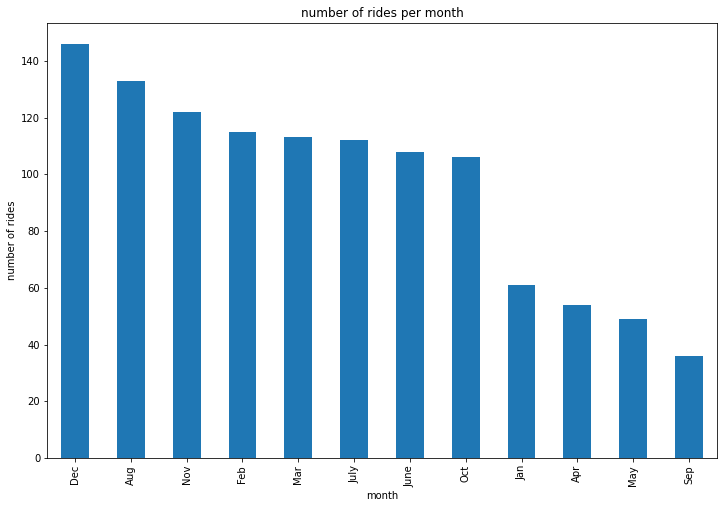

In [23]:
data.month.value_counts().plot(kind='bar',figsize=(12,8))
plt.xlabel('month')
plt.ylabel('number of rides')
plt.title('number of rides per month')

Number of trips per Purpose.

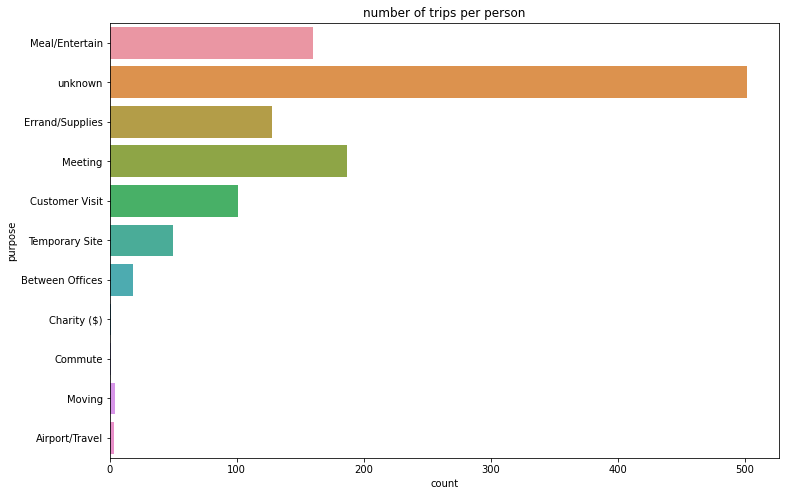

In [24]:
plt.figure(figsize=(12,8))
plt.xlabel('number of rides')
plt.ylabel('purpose of ride')
plt.title('number of trips per person')
sns.countplot(y='purpose',data=data)
plt.show()

Number of rides per weekday per Category.

<AxesSubplot:title={'center':'Number of Trips per Category per weekday'}, xlabel='weekday', ylabel='count'>

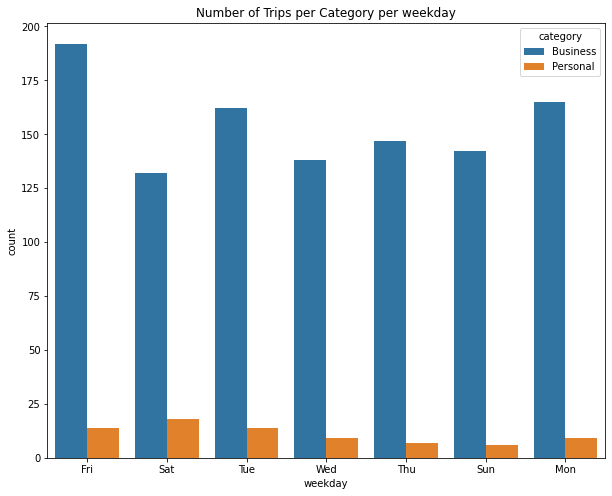

In [25]:
plt.figure(figsize=(10,8))
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Number of Trips per Category per weekday')
sns.countplot(x='weekday',data=data,hue='category')

Most common Start and Stop locations.

Text(0, 0.5, 'Number of rides')

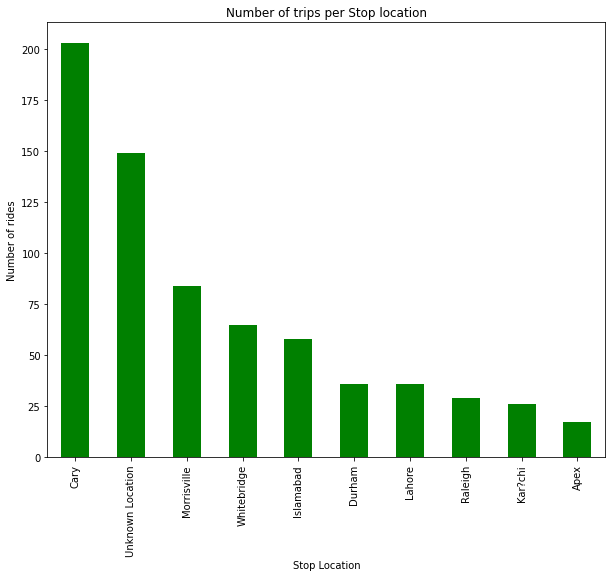

In [33]:
data.stoplocation.value_counts().nlargest(10).plot(kind='bar', figsize=(10,8),color=['green'])
plt.title('Number of trips per Stop location')
plt.xlabel('Stop Location')
plt.ylabel('Number of rides')